<a href="https://colab.research.google.com/github/acubillosde/UNAL-Herramientas-Visualizacion/blob/main/02-Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosde/UNAL-Herramientas-Visualizacion/master/init.py
import init; init.init(force_download=False); 

# **Estadística**

La **estadística** se define como el arte y la ciencia de reunir datos, analizarlos,
presentarlos e interpretarlos.

Las aplicaciones de la estadística son múltiples en diferentes compos.
* Contaduria
* Marketing
* Finanzas
* Producción
* Economía
* Ingeniería
* Salud

### **Datos**
Datos son hechos/informaciones y cifras que se recogen, analizan y resumen para su presentación e interpretación. A todos los datos reunidos para un determinado estudio se les llama conjunto de datos para el estudio.

## **Elementos, variables y observaciones**
**Elementos** son las entidades de las que se obtienen los datos. 
Una **variable** es una característica de los elementos que es de interés.
Los valores encontrados para cada variable en cada uno de los elementos constituyen los
**datos**. Al conjunto de mediciones obtenidas para un determinado elemento se le llama **observación**.

### **Datos cualitativos y cuantitativos**
Los datos también son clasificados en **cualitativos** y **cuantitativos**. Los **datos cualitativos** comprenden etiquetas o nombres que se usan para identificar un atributo de cada elemento. Los **datos
cualitativos** emplean la escala nominal o la ordinal y pueden ser numéricos o no. Los datos cuantitativos requieren valores numéricos que indiquen cuánto o cuántos. Los datos cuantitativos se
obtienen usando las escalas de medición de intervalo o de razón.

# **Estadística Descriptiva**
La **estadística descriptiva** se puede definir como resúmenes de datos, que pueden ser tabulares, gráficos o numéricos.

En muchas situaciones se requiere información acerca de grupos grandes de elementos (individuos, empresas, votantes, hogares, productos, clientes, etc.). Pero, debido al tiempo, costo y a otras consideraciones, sólo es posible recolectar los datos de una pequeña parte de este grupo. Al grupo grande de elementos en un determinado estudio se le llama **población** y al grupo pequeño **muestra**. En términos formales se emplean las definiciones siguientes.

### **Población**
La población es el conjunto de todos los elementos de interés en un estudio determinado.

### **Muestra**

La muestra es un subconjunto de la población.

Al proceso de realizar un estudio para recolectar datos de toda una población se le llama **censo**. Al proceso de efectuar un estudio para recolectar datos de una muestra se le llama **encuesta muestral**. Una de las principales contribuciones de la estadística es emplear datos de una muestra para hacer estimaciones y probar hipótesis acerca de las características de una población mediante un proceso al que se le conoce como **inferencia estadística**.


In [4]:
import numpy as np
import pandas as pd

ventas = pd.read_excel('local/data/ventas_gaseosas.xlsx')
ventas.head()

,ventas
0,Coke Classic
1,Diet Coke
2,Pepsi
3,Diet Coke
4,Coke Classic


In [5]:
marcas_gaseosas = ventas['ventas']
marcas_gaseosas.head()

0    Coke Classic
1       Diet Coke
2           Pepsi
3       Diet Coke
4    Coke Classic
Name: ventas, dtype: object

Vamos a determinar la frecuencia de cada marca de gaseosa. Para ello importamos de la librería collections la función Counter().

In [6]:
from collections import Counter

frec_marcas_gaseosas = Counter(marcas_gaseosas)
frec_marcas_gaseosas

Counter({'Coke Classic': 19,
         'Diet Coke': 8,
         'Pepsi': 13,
         'Dr. Pepper': 5,
         'Sprite': 5})

### **Clientes Banco de Alemania**

Trabajemos ahora con la base de datos de clientes que han solicitado créditos del banco alemán.

In [7]:
banco = pd.read_csv('local/data/german_credit_data.csv')
banco.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Analicemos la variable 'Credit amount', la cual nos indica el monto de préstamo solicitado por cada cliente

In [8]:
credito = banco['Credit amount']
credito.head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: Credit amount, dtype: int64

In [9]:
genero = banco['Sex']
genero.head()

0      male
1    female
2      male
3      male
4      male
Name: Sex, dtype: object

In [10]:
proposito = banco['Purpose']
proposito.head()

0               radio/TV
1               radio/TV
2              education
3    furniture/equipment
4                    car
Name: Purpose, dtype: object

### **Diagramas de Barras**
Son útilies para representar las frecuencias de variables cualitativas. En el eje $x$ ubicamos las categorías o valores de la variable, mientras en el eje $y$ podemos ubicar las frecuencias absolutas o relativas.

Para contruir el diagrama de barras importaremos la librería matplotlib y usaremos la función bar().

Construyamos el diagrama de barras para la venta de gaseosas. De la variable marcas_gaseosas (que es un diccionario) vamos a extraer las categorías con el comando keys() y los valores con values() para finalmente convertir estos dos objetos en listas con el comando list().

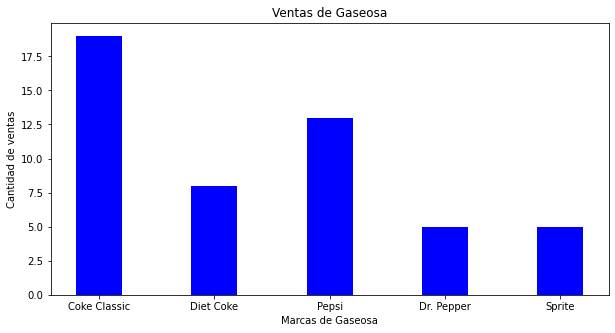

In [11]:
import matplotlib.pyplot as plt

marcas_g = list(frec_marcas_gaseosas.keys())
valores_g = list(frec_marcas_gaseosas.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(marcas_g, valores_g, color ='blue',
        width = 0.4)
 
plt.xlabel("Marcas de Gaseosa")
plt.ylabel("Cantidad de ventas")
plt.title("Ventas de Gaseosa")
plt.show()

### **Tabla de frecuencias datos agrupados**

Vamos a construir una función que nos calcule los puntos de corte de las clases generadas para calcular las frecuencias de datos cuantitativos agrupados.

In [12]:
def puntos_corte(x):
    k = int(1 + 3.332*np.log10(len(x))) + 1 #Se calcula el número de clases utilizando la fórmula de sturges
    amp = (x.max() - x.min()) / k #Cálculo de la amplitud

    x_i = [] #Se crea una lista vacia

    for i in range(k + 1):
        x_i.append(x.min() + i*amp) #Se generan los puntos de corte agragandolos a la lista vacia x_i
    return x_i


def frecuencia_clases(x):
    k = int(1 + 3.332*np.log10(len(x))) + 1

    frec_i = []

    for j in range(k):
        if j < k-1:
            frec_i.append(len(x[(x >=  puntos_corte(x)[j]) & (x < puntos_corte(x)[j+1])]))
        elif j >= k-1:
            frec_i.append(len(x[(x >=  puntos_corte(x)[j]) & (x <= puntos_corte(x)[j+1])]))
    return frec_i

### **Ejemplo**

Los siguientes datos representan la duración de una llamada que realizan personas a un call center en minutos.  

In [13]:
np.random.seed(1234)

llamadas = 14*np.random.rand(100) + 1
llamadas

array([ 3.68127231,  9.70952279,  7.12818835, 11.99502017, 11.91966131,
        4.81629647,  4.87049957, 12.22621049, 14.41395095, 13.26305689,
        6.00944178,  8.01393176, 10.56848109, 10.97782838,  6.18351057,
        8.8567466 ,  8.04316431,  1.19275829, 11.8195727 , 13.35697667,
        6.10840377,  9.6155465 ,  2.05533738,  6.16353608, 14.06396143,
       10.11929401,  6.56083609, 12.042222  ,  5.43570571,  8.95338114,
       13.16778345,  7.10642793, 12.23006699,  3.01273554, 10.8596536 ,
       10.86413831,  4.06308948, 13.9481468 ,  7.18997058, 13.73042343,
        1.83732912,  3.58001917,  1.6629739 , 10.44833321,  9.32474692,
        8.46634228,  1.60653688,  8.86006312,  5.61535824,  8.04153566,
        2.56652045,  9.50071189,  8.923225  ,  1.09469687,  9.64418392,
       13.76972041, 12.06733786, 14.88914053, 14.42322467, 12.08749789,
        4.99351344,  9.74883387,  7.69331314,  3.7394525 ,  6.35244433,
        1.75423159,  7.32307772, 14.74806638,  2.73519781,  2.67

Con la anterior función calculamos los puntos de corte de las clases.

In [14]:
puntos_corte(llamadas)

[1.0869192322198116,
 2.8121968940219677,
 4.537474555824124,
 6.2627522176262795,
 7.988029879428436,
 9.713307541230591,
 11.438585203032748,
 13.163862864834904,
 14.88914052663706]

Ahora calculamos la frecuencia de cada una de las clases generadas previamente.

In [15]:
frecuencia_clases(llamadas)

[13, 8, 10, 12, 20, 12, 11, 14]

### **Ejercicio**

Consideremos la base de datos de los clientes del Banco de Alemania, vamos a tomar la variable monto solicitado por los clientes.

### **Histogramas**

Los **histogramas** son representaciones gráficas utilizadas para visualizar la frecuencia de datos cuantitativos agrupados en intervalos o clases, permiten identificar la forma en que están distribuidos los datos, así como la presencia de datos atípicos.

### **Ejemplo**
Construyamos el histograma del tiempo de duración de las llamadas en el call center

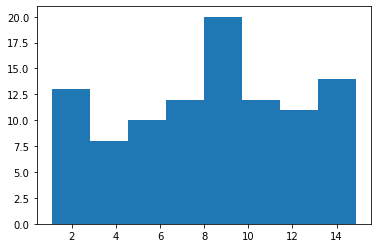

In [16]:
plt.hist(llamadas, bins= 8)
plt.show()

### **Ejercicio**

Construir el histograma de la variable credito.

## **Diagramas circulares (Pastel)**

La gráfica de **pastel** proporciona otra gráfica para presentar distribuciones de frecuencia re-
lativa y de frecuencia porcentual de datos cualitativos. Para elaborar una gráfica de pastel, pri-
mero se dibuja un círculo que representa todos los datos. Después se usa la frecuencia relativa
para subdividir el círculo en sectores, o partes, que corresponden a la frecuencia relativa de
cada clase.

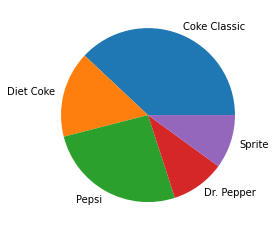

In [17]:
plt.pie(valores_g, labels = marcas_g)
plt.show()

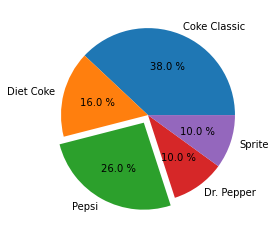

In [18]:
desfase = (0, 0, 0.1, 0, 0)

plt.pie(valores_g, labels = marcas_g, autopct = '%0.1f %%', explode= desfase)
plt.show()

## **Medidas de tendencia central y de dispersión**

Para calcular las medidas de tendencia central y de dispersión en Python, vamos a utilizar la librería statistics.

In [19]:
import statistics as stats

### **Cálculo de promedios y de valores medios**
La **media** puede considerarse como el *"punto de equilibrio"* de un conjunto de datos. Se calcula sumando todas las observacionesy dividiendo por el tamaño de la muestra. Es decir, 
$$
    \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

Para calcular la media utilizaremos la función Media: mean(data) de la librería statistics

La función mean() devuelve la media aritmética de los datos de una muestra o población. Esta media se calcula sumando todos los valores y después el resultado de la suma se divide entre el número de elementos.

Si no se facilitan elementos la función producirá el error StatisticsError.

### **Ejemplo**
Consideremos una muestra de edades de 10 personas.

In [20]:
edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
stats.mean(edades)

31

Podemos calcular la media con análisis un poco más detallada sin utilizar un comado directamente

In [21]:
sum(edades) / len(edades)

31.0

### **Ejercicio 1**
Calcular la media para la base de datos de duración de la llamadas en el call center de las dos maneras descritas en el ejemplo.

### **Ejercicio 2**
Calcular la media para la base de datos del banco alemán de las dos maneras descritas en el ejemplo.

### **Mediana: median(data)**
La **mediana** es el dato central en un conjunto ordenado de datos de tamaño $n$. Para calcularla es necesario orgaizar los datos de manera ascendente y aplicar

$$
    \tilde{x} = \left\{
                \begin{array}{ll}
                  x_{\frac{n+1}{2}},\;\;{\rm{si}}\;\;\;n\;\text{es impar}\\
                  \left[x_{\frac{n}{2}} + x_{\frac{n}{2}+1}\right]\frac{1}{2},\;\;{\rm{si}}\;n\;{\rm{\text{es par}}}
                \end{array}
              \right.
$$

*Observación:
La mediana es una medida **robusta**, es decir, no se ve afectada por la presencia de datos atípicos, por lo que se considera más`respresentativa que la media cuando los datos representan distribuciones asimétricas.*

La función median() devuelve la mediana o valor medio de los datos. La mediana es el valor central de un grupo de números ordenados por tamaño. Si la cantidad de elementos es par, la mediana es el promedio de los dos números centrales.

La función no requiere que la secuencia de números esté ordenada. Si no hay elementos la función retorna el error StatisticsError.

In [22]:
edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
stats.median(edades)

30.0

### **Moda: mode(data)**
La moda de un conjunto de datos es la observación con mayor frecuencia. A diferencia de la media y la mediana, la moda no es única. Cuando el conjunto de datos presenta dos o más modas diremos que es **multimodal.**

La función mode() devuelve el valor más frecuente de los datos.

Si no hay elementos la función produce el error StatisticsError

In [23]:
edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
stats.mode(edades)

26

Cuando el conjunto de datos tiene dos o más modas utilizamos la función multimode().

*Observación:
La función multimoda de la librería statistics está disponible a partir de Python 3.8 y versiones superiores.*

In [24]:
marcas_ropa = ['nike', 'adidas', 'nike', 'jordan','jordan', 'rebook', 'under-armour', 'adidas']
marcas_ropa

['nike',
 'adidas',
 'nike',
 'jordan',
 'jordan',
 'rebook',
 'under-armour',
 'adidas']

In [25]:
stats.multimode(marcas_ropa)

['nike', 'adidas', 'jordan']

## **Medidas de dispersión**

### **Varianza (población): pvariance(data, mu=None)**
La varianza es la suma de las diferencias con la media elevadas al cuadrado.
$$
  \sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2 
$$

La función pvariance() devuelve la varianza de una población de datos. Esta función es equivalente a variance() pero se aplica a una población en lugar de a una muestra.

La varianza es la media de las diferencias con la media elevadas al cuadrado.

In [26]:
edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
stats.pvariance(edades)   

46.8

### **Desviación estándar (población): pstdev(data, mu=None)**

La función pstdev() devuelve la desviación estándar de una población de datos, que se corresponde con la raíz cuadrada de la varianza de dicha población. Esta función es equivalente a stdev() pero se aplica a una población en lugar de a una muestra.

La desviación estándar mide cuánto se separan los datos. Así, para cada valor se tiene una forma de saber si es muy grande, muy pequeño o normal. Permite conocer a qué distancia están los valores de la desviación estándar de la media.

El argumento mu es opcional y si se facilita debe ser la media de los datos de la población. En caso contrario, la función lo calculará automáticamente.

$$
    \sigma = \sqrt{\sigma^2}
$$

In [27]:

edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
stats.pstdev(edades)

6.841052550594828

### **Varianza (muestra): variance(data, xbar=None)**

La función variance() devuelve la varianza de una muestra de datos. La varianza mide en qué medida se dispersan los valores de una muestra alrededor de un valor central.

El argumento xbar es opcional y si se facilita debe ser la media de los datos. En caso contrario, la función calculará este dato automáticamente.

Para calcular la varianza de una población entera utilizar la función pvariance().

Si no hay elementos o hay menos de dos la función producirá el error StatisticsError

$$
  s^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2 
$$

In [28]:
muestra_edades = [22, 23, 26, 26, 34, 38, 40]
stats.variance(muestra_edades)

54.14285714285714

### **Desviación estándar (muestra): stdev(data, xbar=None)**

La función stdev() devuelve la desviación estándar de una muestra de datos, que se corresponde con la raíz cuadrada de la varianza de dicha muestra.

La desviación estándar mide cuánto se separan los datos. Así, para cada valor se tiene una forma de saber si es muy grande, muy pequeño o normal. Permite conocer a qué distancia están los valores de la desviación estándar de la media.

Para calcular la desviación estándar de una población entera utilizar la función pstdev().

El argumento xbar es opcional y si se facilita debe ser la media de los datos. En caso contrario, la función lo calculará automáticamente.

$$
    s = \sqrt{s^2}
$$

In [29]:
muestra_edades = [22, 23, 26, 26, 34, 38, 40]
stats.stdev(muestra_edades)

7.358183005529092

### **Ejercicio**

Calcular los estadísticos utilizados previamente para la siguiente lista de producción de automoviles diarios vendidos en un concesionario.

In [30]:
autos_vendidos = [19, 22, 34, 26, 32, 30, 24, 24]

### **Cuartiles**
Los **cuantiles** son medidas que dividen el conjunto de datos en partes iguales.

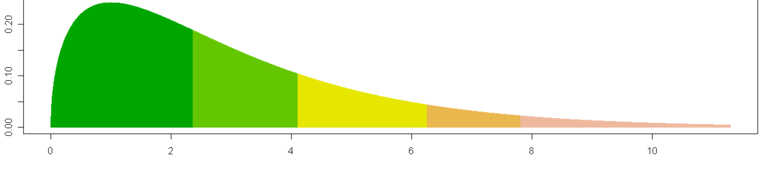

In [31]:
Image("local/images/quantile.png", width = 770, height = 270)


* De donde, tenemos que los quintiles dividen las observaciones en cinco partes iguales, los deciles en 10 partes iguales, los percentiles en 100 y así sucesivamente.
* En particular, trabajeremos con los cuartiles, que dividen el conjunto de observaciones en cuatro partes iguales y los denotaremos por $Q_1$, $Q_2$, $Q_3$ y $Q_4$.
* Es importante observar que el cuartil número dos es quien sobrepasa el 50% de los datos y es sobrepasado por el 50% de los dos restantes, por lo que equivale a la mediana de las observaciones.

### **Cuartiles**
* **Cuartil 1 $(Q_1)$**: Valor de la variable que supera el 25% de los datos y es superada por el 75% de los datos.
* **Cuartil 2 $(Q_2)$**: Valor de la variable que supera el 50% de los datos y es superada por el 50% de los datos.
* **Cuartil 3 $(Q_3)$**: Valor de la variable que supera el 75% de los datos y es superada por el 25% de los datos.

### **Nota**
Para calcular los cuartiles siempre es necesario organizar los datos de manera ascendente.

Podemos calcular los cuartiles lo hacemos de la siguiente manera

$$
    Q_i = \left\{
                \begin{array}{ll}
                  x_{\frac{k(n+1)}{4}},\;\;{\rm{si}}\;\;\;n\;\text{es impar}\\
                  \left[x_{\frac{kn}{4}} + x_{\frac{kn}{4}+1}\right]\frac{k}{4},\;\;{\rm{si}}\;n\;{\rm{\text{es par}}}
                \end{array}
              \right.
$$

### **Ejemplo**
Vamos a calcular los cuartiles del caojunto de datos de edades

In [32]:
edades = [22, 23, 26, 26, 26, 34, 34, 38, 40, 41]
stats.quantiles(edades, n = 4)

[25.25, 30.0, 38.5]

### **Diagrama de Cajas y Bigotes (Box-Plot)**
Los diagramas de cajas y bigotes son representaciones de la distribución de un conjunto de datos en las que se involucran **cinco** números principales:
* Dato mínimo ($x_{min}$)
* Primer cuartil ($Q_1$)
* Mediana ($Q_2$, $\tilde{x}$)
* Tercer cuartil ($Q_3$)
* Dato máximo ($x_{max}$)

Son gráficos muy útiles porque permiten identificar valores atípicos, así como la variabilidad de los datos.

Para la construcción de estos diagramas debemos calcular el *rango intercuartílico* (RI), que se define por
$$
    \text{RI} = Q_3 - Q_1
$$
Los datos que excedan $1.5\text{RI}$ desde la caja, se consideran datos atípicos.

Los datos que excedan $3\text{RI}$ desde la caja, se consideran datos atípicos extremos.

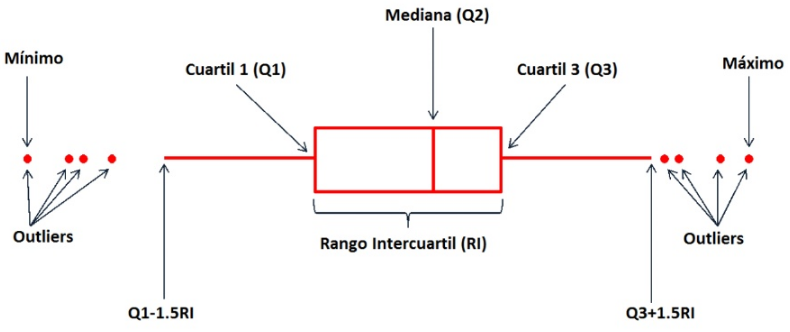

In [33]:
Image("local/images/box-plot.png", width = 900, height = 400)


Otros aspectos que podemos destacar del diagrama de cajas y bogotes son:
* La caja contiene el 50% de los datos.
* Si la mediana está en el centro de la caja la districución de datos es simétrica.
* El largo de los bigotes indica la variablidad de los datos.

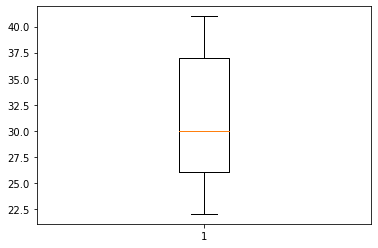

In [34]:
plt.boxplot(edades)
plt.show()

In [52]:
edad = pd.DataFrame(edades, columns = ['edades'])
q_3 = edad['edades'].quantile([0.25, 0.5, 0.75])
q_3


0.25    26.0
0.50    30.0
0.75    37.0
Name: edades, dtype: float64